In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
import regressors
from regressors import stats

In [3]:
#! pip install regressors

In [4]:
df=pd.read_csv('./Data/preprocess_data.csv')
df=df.drop(columns=['WEIGHT','HEIGHT'])
df.head()

,IDNO,BODYFAT,DENSITY,AGE,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M
0,1,12.6,1.0708,23,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,69.87525,1.72085
1,2,6.9,1.0853,22,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,78.48225,1.83515
2,3,24.6,1.0414,22,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,69.76200,1.68275
3,4,10.9,1.0751,26,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,83.69175,1.83515
4,5,27.8,1.0340,24,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,83.46525,1.80975


Adiposity=BMI index
Weight and height are use another system to measure with lbs and inches
Others are measured by cm

In [5]:
df.describe()

,IDNO,BODYFAT,DENSITY,AGE,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M
count,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,18.96746,1.055574,44.884921,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,81.052755,1.781780
std,72.890329,7.69322,0.019031,12.602040,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,13.313289,0.093037
min,1.000000,1.90000,0.995000,22.000000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,53.680500,0.749300
25%,63.750000,12.80000,1.041400,35.750000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,72.027000,1.733550
50%,126.500000,19.00000,1.054900,43.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,79.954500,1.778000
75%,189.250000,24.60000,1.070400,54.000000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,89.241000,1.835150
max,252.000000,45.10000,1.108900,81.000000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.506950,1.974850


Split the dataset into response variable and predict variables

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y = df.BODYFAT
x = df.iloc[:,3:] # Dropping Bodyfat as well as Density, as it is an almost perfect predictor.
name=x.columns.tolist()
n=len(df)

#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=42)
#print("Train set", X_train.shape)
#print("Test set", X_test.shape)

In [7]:
type(name)

list

In [8]:
#using t test to calculate the CI function
def mean_confidence_interval(mean,std,n,confidence=0.95):
    h = std * sp.stats.t._ppf((1+confidence)/2., n-1)
    return mean-h, mean+h

Full Model of Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(x, y)
bodyfat_predictions=linear_reg.predict(x)
linear_rmse=np.sqrt(mean_squared_error(y,bodyfat_predictions))
print("Linear Regression Root Mean Squared Error:",linear_rmse)

Linear Regression Root Mean Squared Error: 3.8609151026390602


In [10]:
print("Intercept:", linear_reg.intercept_)
print("\nCoefficients:\n--------------")
a = pd.Series(linear_reg.coef_,index=x.columns)
a.loc[lambda x: x!=0]

Intercept: -11.381626918789593

Coefficients:
--------------


AGE          0.055271
ADIPOSITY    0.084196
NECK        -0.440519
CHEST       -0.054560
ABDOMEN      0.879544
HIP         -0.209664
THIGH        0.200639
KNEE        -0.001630
ANKLE        0.140163
BICEPS       0.164524
FOREARM      0.410250
WRIST       -1.499489
WEIGHT_KG   -0.162894
HEIGHT_M    -2.313418
dtype: float64

In [11]:
print('Linear Regression: R^2 score',linear_reg.score(x, y))

Linear Regression: R^2 score 0.7471336456138169


In [12]:
regressors.stats.summary(linear_reg, x, y, xlabels=name)

Residuals:
Min      1Q  Median      3Q      Max
-9.2061 -2.8746  0.1674  2.6293  10.3246


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept -11.381627   15.483239  -0.7351  0.462969
AGE          0.055271    0.021645   2.5535  0.011257
ADIPOSITY    0.084196    0.212813   0.3956  0.692711
NECK        -0.440519    0.180317  -2.4430  0.015255
CHEST       -0.054560    0.069399  -0.7862  0.432508
ABDOMEN      0.879544    0.067465  13.0371  0.000000
HIP         -0.209664    0.083441  -2.5127  0.012608
THIGH        0.200639    0.117222   1.7116  0.088202
KNEE        -0.001630    0.201964  -0.0081  0.993568
ANKLE        0.140163    0.185977   0.7537  0.451758
BICEPS       0.164524    0.147359   1.1165  0.265283
FOREARM      0.410250    0.168435   2.4357  0.015562
WRIST       -1.499489    0.452609  -3.3130  0.001059
WEIGHT_KG   -0.162894    0.039919  -4.0807  0.000060
HEIGHT_M    -2.313418    3.600528  -0.6425  0.521121
---
R-squared:  0.74713,    Adjusted R-squared:

Using KFold to find the best lambda in lasso regression

C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

(0.02, 0.98)

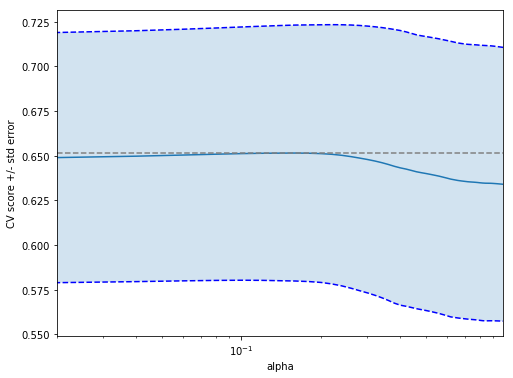

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.arange(0, 1, 0.02)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(x, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [14]:
lasso_cv = linear_model.LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(x, y)):
    lasso_cv.fit(x.loc[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(x.loc[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.12000, score: 0.74362
[fold 1] alpha: 0.98000, score: 0.44988
[fold 2] alpha: 0.08000, score: 0.70538

C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\U



Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


In [15]:
from sklearn.model_selection import validation_curve
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), x.loc[indices], y[indices], param_name="alpha", param_range=np.arange(0, 1, 0.02),
    cv=5)

C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yixuan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

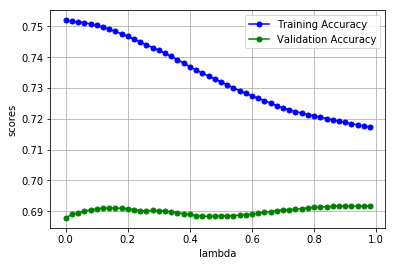

In [16]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(np.arange(0, 1, 0.02), train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(np.arange(0, 1, 0.02), test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('scores')
plt.grid()
plt.savefig("score of training and testing(lambda)")
plt.show()

Lasso Regression with lambda=1

In [17]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(x,y)

bodyfat_predictions_l = lasso_reg.predict(x)
lasso_rmse = np.sqrt(mean_squared_error(y,bodyfat_predictions_l))
print("Lasso Root Mean Squared Error:", lasso_rmse)

Lasso Root Mean Squared Error: 4.101344305254341


In [18]:
print("Intercept:", lasso_reg.intercept_)
print("\nCoefficients:\n--------------")
b = pd.Series(lasso_reg.coef_,index=x.columns)
b.loc[lambda x: x!=0]

Intercept: -38.872876032040104

Coefficients:
--------------


AGE          0.002093
ABDOMEN      0.838159
WEIGHT_KG   -0.244658
dtype: float64

In [19]:
print('Lasso Regression with lambda=1: R^2 score', lasso_reg.score(x, y))

Lasso Regression with lambda=1: R^2 score 0.7146597730592293


In [20]:
regressors.stats.summary(lasso_reg, x, y,xlabels=name)

Residuals:
Min      1Q  Median      3Q      Max
-10.1755 -2.9786 -0.0265  2.9991  11.3068


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept -38.872876   16.447420  -2.3635  0.018868
AGE          0.002093    0.022993   0.0910  0.927549
ADIPOSITY    0.000000    0.226066   0.0000  1.000000
NECK        -0.000000    0.191546  -0.0000  1.000000
CHEST        0.000000    0.073721   0.0000  1.000000
ABDOMEN      0.838159    0.071666  11.6954  0.000000
HIP         -0.000000    0.088637  -0.0000  1.000000
THIGH        0.000000    0.124522   0.0000  1.000000
KNEE        -0.000000    0.214541  -0.0000  1.000000
ANKLE       -0.000000    0.197558  -0.0000  1.000000
BICEPS       0.000000    0.156536   0.0000  1.000000
FOREARM      0.000000    0.178924   0.0000  1.000000
WRIST       -0.000000    0.480794  -0.0000  1.000000
WEIGHT_KG   -0.244658    0.042404  -5.7696  0.000000
HEIGHT_M    -0.000000    3.824742  -0.0000  1.000000
---
R-squared:  0.71466,    Adjusted R-squared

In [21]:
#CI of intercept
mean_confidence_interval(mean=-38.872876,std=16.447420,n=n)

(-71.26541553044535, -6.480336469554636)

In [22]:
#CI of age
mean_confidence_interval(mean=0.002093,std=0.022993,n=n)

(-0.043190799004556954, 0.04737679900455695)

In [23]:
#CI of abdomen
mean_confidence_interval(mean=0.838159,std=0.071666,n=n)

(0.6970156633557788, 0.9793023366442212)

In [24]:
#CI of weight_kg
mean_confidence_interval(mean=-0.244658,std=0.042404,n=n)

(-0.32817099147519824, -0.16114500852480176)

In [25]:
#prediction of new data
predict=pd.DataFrame({"AGE":[40],"ADIPOSITY":[0],"NECK":[0],"CHEST":[0],"ABDOMEN":[80],"HIP":[0],"THIGH":[0],
                        "KNEE":[0],"ANKLE":[0],"BICEPS":[0],"FOREARM":[0],"WRIST":[0],"WEIGHT_KG":[70],"HEIGHT_M":[0]})
bodyfat_pre=lasso_reg.predict(predict)
bodyfat_pre

array([11.13749749])

Lasso Regression with lambda=0.2

In [27]:
lasso_reg2 = Lasso(alpha=0.2)
lasso_reg2.fit(x,y)

bodyfat_predictions_l2 = lasso_reg2.predict(x)
lasso_rmse2 = np.sqrt(mean_squared_error(y,bodyfat_predictions_l2))
print("Lasso Root Mean Squared Error:", lasso_rmse2)

Lasso Root Mean Squared Error: 3.898217089681482


In [28]:
print("Intercept:", lasso_reg2.intercept_)
print("\nCoefficients:\n--------------")
c = pd.Series(lasso_reg2.coef_,index=x.columns)
c.loc[lambda x: x!=0]

Intercept: -27.70378243524968

Coefficients:
--------------


AGE          0.037477
ADIPOSITY    0.023614
NECK        -0.354916
ABDOMEN      0.870718
HIP         -0.108048
THIGH        0.181494
BICEPS       0.113164
FOREARM      0.265281
WRIST       -0.814519
WEIGHT_KG   -0.235806
dtype: float64

In [29]:
print('Lasso Regression with lambda=0.2: R^2 score', lasso_reg2.score(x, y))

Lasso Regression with lambda=0.2: R^2 score 0.7422239376429307


In [30]:
regressors.stats.summary(lasso_reg2, x, y, xlabels=name)

Residuals:
Min      1Q  Median      3Q     Max
-9.6067 -2.8516   0.033  2.7573  9.7223


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept -27.703782   15.632829  -1.7722  0.077582
AGE          0.037477    0.021854   1.7149  0.087605
ADIPOSITY    0.023614    0.214869   0.1099  0.912578
NECK        -0.354916    0.182059  -1.9495  0.052355
CHEST       -0.000000    0.070070  -0.0000  1.000000
ABDOMEN      0.870718    0.068116  12.7828  0.000000
HIP         -0.108048    0.084247  -1.2825  0.200847
THIGH        0.181494    0.118355   1.5335  0.126417
KNEE        -0.000000    0.203915  -0.0000  1.000000
ANKLE        0.000000    0.187773   0.0000  1.000000
BICEPS       0.113164    0.148783   0.7606  0.447614
FOREARM      0.265281    0.170062   1.5599  0.120042
WRIST       -0.814519    0.456982  -1.7824  0.075894
WEIGHT_KG   -0.235806    0.040304  -5.8506  0.000000
HEIGHT_M    -0.000000    3.635314  -0.0000  1.000000
---
R-squared:  0.74222,    Adjusted R-squared:  